In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\bobkw\Desktop\FYP_DATA.csv")
print(df)

    Gender  Hand   Forearm  Cheek  Comfort
0        1   33.6     33.0   34.1        2
1        1   33.5     33.6   34.2        2
2        1   33.1     32.9   33.4        1
3        1   33.0     32.6   32.9        1
4        1   33.4     33.2   33.8        2
5        1   33.4     33.3   34.0        2
6        1   34.1     32.8   33.9        2
7        1   32.8     32.7   33.5        1
8        1   33.6     33.4   34.2        2
9        1   33.4     33.5   34.1        2
10       1   34.3     33.8   34.6        3
11       1   33.4     33.6   34.3        3
12       1   34.0     32.9   34.4        2
13       0   34.2     33.6   34.6        1
14       0   33.8     33.2   34.7        2
15       0   34.6     34.2   35.4        3
16       0   33.9     33.7   34.8        3
17       0   34.6     34.5   34.8        3
18       0   33.5     33.5   34.2        2
19       0   34.3     33.3   34.6        2
20       0   33.7     33.8   35.0        2
21       0   33.8     33.4   34.5        2
22       0 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1  2  0]
 [ 2 12  3]
 [ 0  0  1]]
             precision    recall  f1-score   support

          1       0.33      0.33      0.33         3
          2       0.86      0.71      0.77        17
          3       0.25      1.00      0.40         1

avg / total       0.75      0.67      0.69        21



In [9]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [11]:
error = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

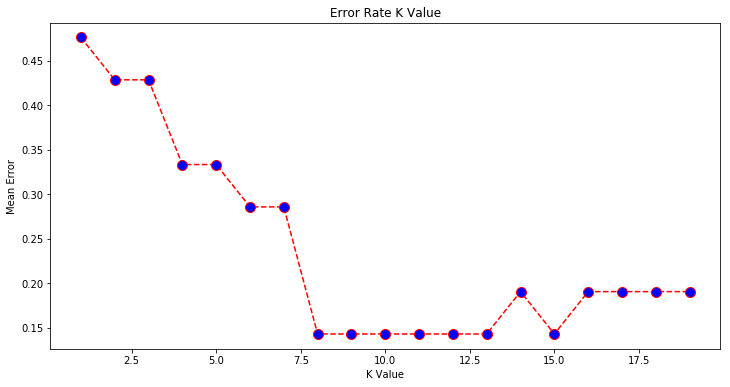

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')